In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import shap 
import matplotlib.pyplot as plt 
import numpy as np

In [12]:
import pandas as pd
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df[:10]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [13]:
df1 = pd.read_csv("seeds_dataset.csv", sep="\t")
df1[:10]

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,Assymmetry,LengthOfGroove,ClassID
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [6]:
df2 = pd.read_excel ("Concrete_Data.xls")
df2[:10]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


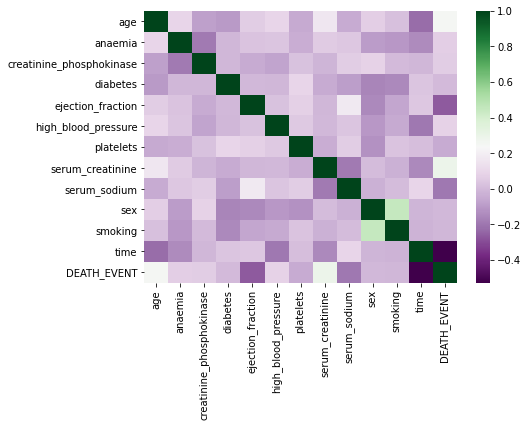

14

In [15]:
import seaborn as sns 
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='PRGn')

plt.show()
14


In [17]:
df = df.rename(columns = {'DEATH_EVENT' : 'death_event'})



In [19]:
 X = df.drop('death_event',axis=1)
y = df['death_event']


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 0)
print(f'{X_train.shape}')
print(f'{X_test.shape}')


(209, 12)
(90, 12)


In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [22]:
from sklearn.metrics import classification_report
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.85      0.88      0.87        59
           1       0.76      0.71      0.73        31

    accuracy                           0.82        90
   macro avg       0.81      0.80      0.80        90
weighted avg       0.82      0.82      0.82        90



In [23]:
shap.initjs()


In [24]:
rf_tree_explainer = shap.TreeExplainer(rf_classifier)

In [25]:
rf_model_test0_shap_values = rf_tree_explainer.shap_values(X_test.iloc[0,:])
rf_model_test10_shap_values = rf_tree_explainer.shap_values(X_test.iloc[:10,:])
rf_model_all_test_shap_values = rf_tree_explainer.shap_values(X_test)



14

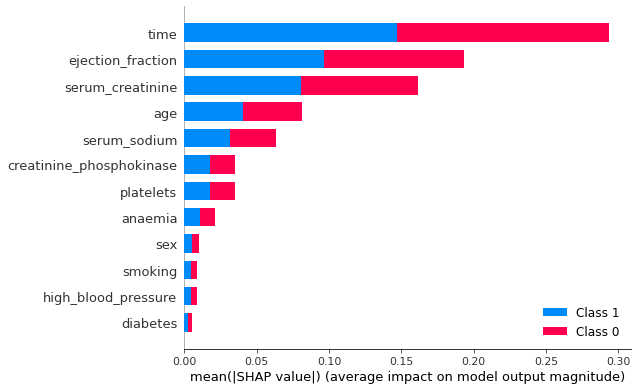

In [27]:
shap.summary_plot(rf_model_all_test_shap_values, feature_names = X.columns)

In [ ]:
shap.summary_plot(rf_model_all_test_shap_values, feature_names = X.columns)

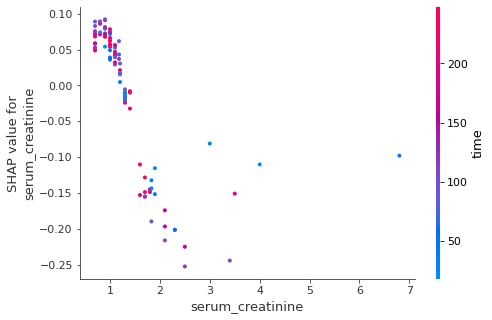

In [28]:
shap.dependence_plot('serum_creatinine',rf_model_all_test_shap_values[0], X_test)



Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


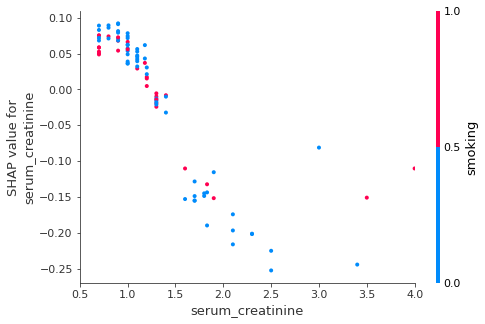

In [29]:
shap.dependence_plot('serum_creatinine',rf_model_all_test_shap_values[0], X_test, 
                     interaction_index = 'smoking', xmin=0.5, xmax=4)



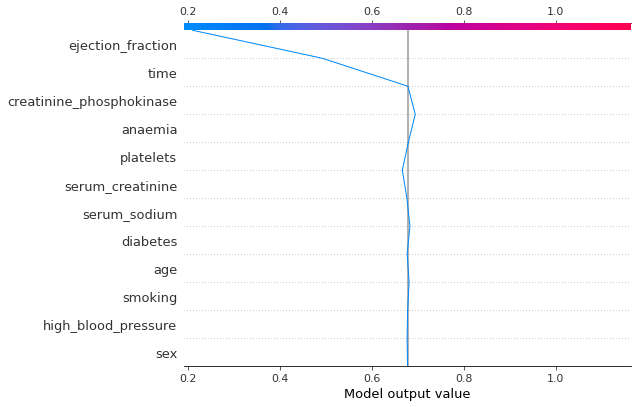

In [30]:
shap.decision_plot(rf_tree_explainer.expected_value[0], rf_model_test0_shap_values[0],feature_names=X.columns.tolist())



In [31]:
shap.decision_plot(rf_tree_explainer.expected_value[0], rf_model_test10_shap_values[0],
                   title = 'Decision Plot for 10 first patients', plot_color = 'PuOr',
                   legend_labels = legend_str,
                   feature_names=X.columns.tolist(), legend_location = 'lower right')



NameError: name 'legend_str' is not defined

NameError: name 'rf_model_test3_shap_values' is not defined

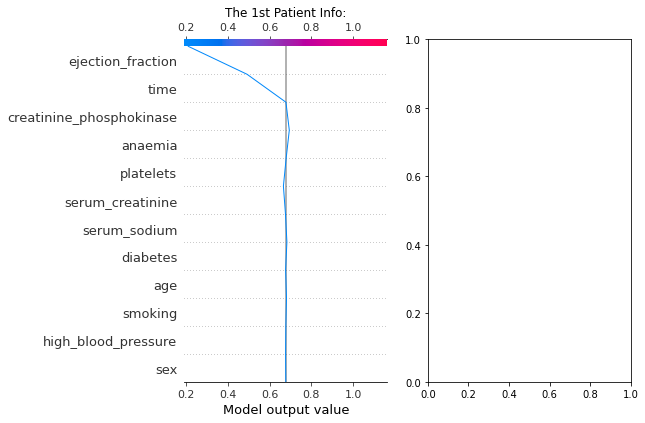

In [32]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(121)
shap.decision_plot(rf_tree_explainer.expected_value[0], rf_model_test0_shap_values[0],
                   feature_names=X.columns.tolist(), show = False)
ax1.title.set_text('The 1st Patient Info:')

ax2 = fig.add_subplot(122)
shap.decision_plot(rf_tree_explainer.expected_value[0], rf_model_test3_shap_values[0],
                   feature_names=X.columns.tolist(), plot_color='PiYG', show = False)
ax2.title.set_text('The 4th Patient Info:')
plt.tight_layout()
plt.show()
14
